In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report,plot_precision_recall_curve
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV,learning_curve
# from lightgbm import LGBMCassifier


In [10]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
dups=df.duplicated()

In [12]:
df[dups]#set of records that are duplicated

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [13]:
df.query("person_age==23 & person_income ==42000 & person_home_ownership=='RENT' & loan_int_rate==9.99" ) #taking the first element to check duplication

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4


In [14]:
df.shape

(32581, 12)

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(32416, 12)

In [49]:
x=df.drop('loan_status',axis=1)
y=df.loan_status

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y,shuffle=True) #stratify to preserve the distribution

In [19]:
y.value_counts(normalize=True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

In [21]:
y_train.value_counts(normalize=True)

0    0.781313
1    0.218687
Name: loan_status, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

0    0.781308
1    0.218692
Name: loan_status, dtype: float64

In [22]:
np.round(x_train.isna().sum() * 100/ x_train.shape[0],3) #whats the percentage of null values in training #no categorical columns have missing value only numerical has the same


person_age                    0.000
person_income                 0.000
person_home_ownership         0.000
person_emp_length             2.800
loan_intent                   0.000
loan_grade                    0.000
loan_amnt                     0.000
loan_int_rate                 9.614
loan_percent_income           0.000
cb_person_default_on_file     0.000
cb_person_cred_hist_length    0.000
dtype: float64

In [23]:
x_train.shape

(25932, 11)

In [25]:
x_train.dropna().shape

(22763, 11)

In [26]:
dropping_value=(25932-22763)/25932
dropping_value


0.12220422643837729

In [27]:
x_train[['person_income','loan_amnt','loan_percent_income']].head()# as the loan_percent_income not adding any value drop that column

,person_income,loan_amnt,loan_percent_income
21415,48000,10000,0.21
12916,85000,7500,0.09
2938,125000,3000,0.02
19114,62000,2300,0.04
6057,48000,4200,0.09


In [29]:
x_train.drop('loan_percent_income',axis=1,inplace=True)
x_test.drop('loan_percent_income',axis=1,inplace=True)

In [31]:
for column in x_train:
    print(column,'---->',x_train[column].nunique())
    if x_train[column].nunique()<20:
        print (x_train[column].value_counts(normalize=True)*100)
    print()


person_age ----> 58

person_income ----> 3680

person_home_ownership ----> 4
RENT        50.320068
MORTGAGE    41.439149
OWN          7.916859
OTHER        0.323924
Name: person_home_ownership, dtype: float64

person_emp_length ----> 36

loan_intent ----> 6
EDUCATION            19.809502
MEDICAL              18.787598
VENTURE              17.542033
PERSONAL             16.878760
DEBTCONSOLIDATION    15.968687
HOMEIMPROVEMENT      11.013420
Name: loan_intent, dtype: float64

loan_grade ----> 7
A    32.932284
B    32.126330
C    19.902052
D    11.121394
E     3.004010
F     0.732685
G     0.181243
Name: loan_grade, dtype: float64

loan_amnt ----> 710

loan_int_rate ----> 346

cb_person_default_on_file ----> 2
N    82.392411
Y    17.607589
Name: cb_person_default_on_file, dtype: float64

cb_person_cred_hist_length ----> 29



In [32]:
x_train.describe() #person max_age is 144 and person_emp_length is 123 which is not realistic

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,25932.000000,2.593200e+04,25206.000000,25932.000000,23439.000000,25932.000000
mean,27.721155,6.589884e+04,4.811315,9611.395187,11.013784,5.793460
std,6.382311,6.333831e+04,4.172822,6339.054572,3.240104,4.052297
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,2.000000
25%,23.000000,3.849500e+04,2.000000,5000.000000,7.900000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.480000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,30.000000


In [38]:
num_cols=[col for col in x_train.columns if x_train[col].dtypes != 'O']
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

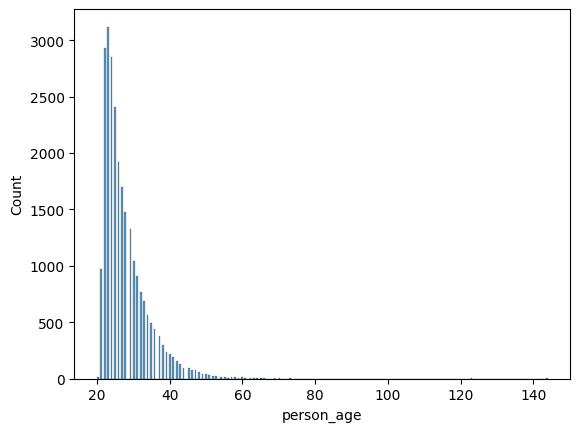

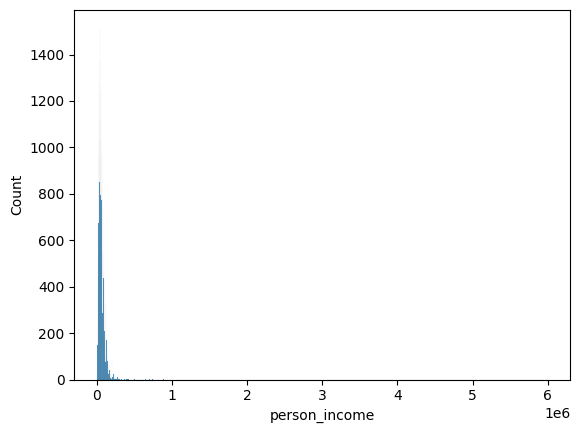

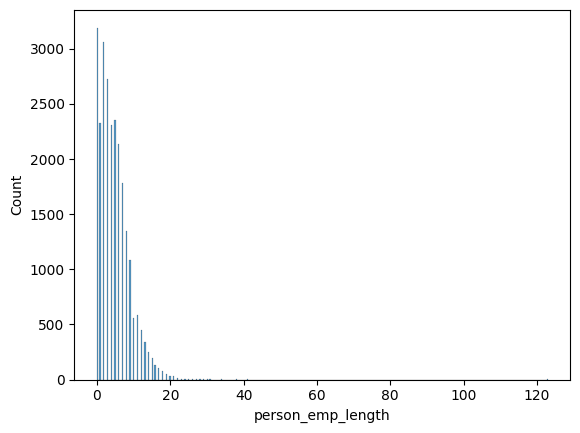

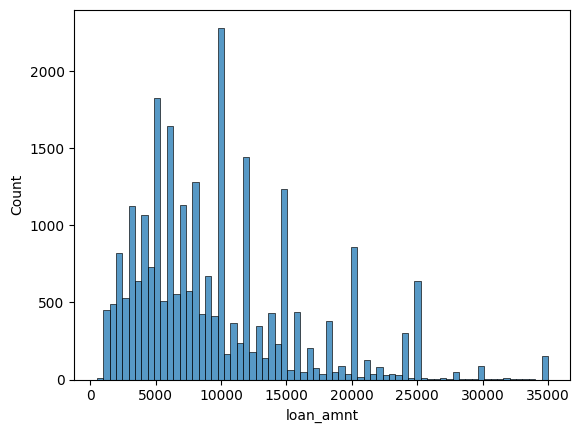

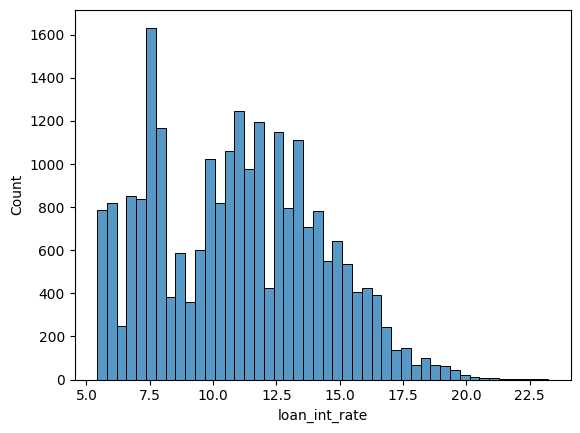

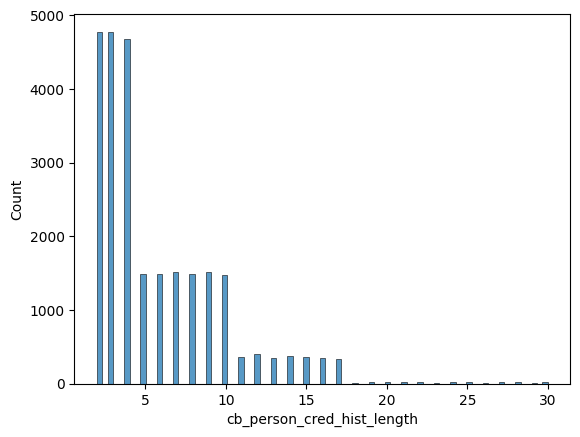

In [40]:
for col in num_cols:
    sns.histplot(x_train[col])
    plt.show()

    #distribution is mostly left skewed and  maximum values of person apply loan is below 60

In [41]:
x_train.loc[x_train['person_age']>=80, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,N,25
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,N,3
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,N,27
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,N,4
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,N,3
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,N,24
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,N,25


In [42]:
x_train=x_train.loc[x_train['person_age']<80, :] #removing persons applying for loan above age 80

x_train.shape

(25924, 10)

In [43]:
#14 is the leagal age  if a person is allowed to work according to govt rules
#potentiall miscalculation
x_train.loc[x_train['person_emp_length']>66, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,N,4
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,3


In [45]:
#other way of checking the same
df.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [46]:
# keeping all the value below 66 and the null values
x_train=x_train.loc[(x_train['person_emp_length']<66) | (x_train['person_emp_length'].isna()), :]

In [48]:
#as the train has dropped some of the null values keeping y_train as same as index if x_train
y_train=y_train[x_train.index]

In [51]:
cat_cols=[cols for cols in x_train.columns if x_train[cols].dtypes=='O']
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [77]:
num_pipe=Pipeline([
    ('impute',IterativeImputer()), #impute missing values
    ('scale',StandardScaler())#scale the values
])

In [78]:
column_transformer=ColumnTransformer([
    ('num_pipe',num_pipe,num_cols),#numerical pipeline
    ('cat_cols',OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_cols) #categorical pipeline
],remainder='passthrough')

In [79]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
    
    # LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    # {'model__n_estimators':[300,400,500],
    #  'model__learning_rate':[0.001,0.01,0.1,1,10],
    #  'model__boosting_type': ['gbdt', 'goss', 'dart'],
    #  'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
    #                                     KNeighborsRegressor()]},
}

In [80]:
for clf ,param in grid.items():
    print(clf),
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [81]:
full_dataframe=pd.DataFrame()
best_algos={}

for clf,param in grid.items():
    pipe=Pipeline([
        ('coltf',column_transformer),
        ('model',clf)
    ])
    gs=RandomizedSearchCV(estimator=pipe,param_distributions=param,scoring='accuracy',n_jobs=-1,verbose=3,n_iter=4,random_state=0)

    gs.fit(x_train,y_train)
    all_res=pd.DataFrame(gs.cv_results_)

    temp=all_res.loc[:, ['params','mean_test_score']]
    algo_name=str(clf).split('(')[0]
    temp['algo']=algo_name

    full_df=pd.concat([full_dataframe,temp],ignore_index=True)
    best_algos[algo_name]=gs.best_estimator_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 5/5] END coltf__num_pipe__impute__estimator=KNeighborsRegressor(), model__n_estimators=400;, score=0.924 total time=  14.9s
[CV 1/5] END coltf__num_pipe__impute__estimator=KNeighborsRegressor(), model__n_estimators=400;, score=0.920 total time=  15.2s
[CV 4/5] END coltf__num_pipe__impute__estimator=KNeighborsRegressor(), model__n_estimators=400;, score=0.922 total time=  15.3s
[CV 2/5] END coltf__num_pipe__impute__estimator=KNeighborsRegressor(), model__n_estimators=400;, score=0.921 total time=  15.8s
[CV 3/5] END coltf__num_pipe__impute__estimator=KNeighborsRegressor(), model__n_estimators=400;, score=0.926 total time=  15.9s
[CV 1/5] END coltf__num_pipe__impute__estimator=LinearRegression(), model__n_estimators=500;, score=0.922 total time=  17.6s
[CV 2/5] END coltf__num_pipe__impute__estimator=LinearRegression(), model__n_estimators=500;, score=0.922 total time=  18.1s
[CV 3/5] END coltf__num_pipe__impute__estimator=Li

In [82]:
full_df.sort_values('mean_test_score',ascending=False)

,params,mean_test_score,algo
3,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922730,RandomForestClassifier
0,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922537,RandomForestClassifier
2,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922537,RandomForestClassifier
1,"{'model__n_estimators': 500, 'coltf__num_pipe_...",0.922537,RandomForestClassifier


In [83]:
full_df.sort_values('mean_test_score',ascending=False).iloc[0,0]

{'model__n_estimators': 400,
 'coltf__num_pipe__impute__estimator': RandomForestRegressor(random_state=0)}

In [85]:
best_estimator=best_algos['RandomForestClassifier']
best_estimator

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=RandomForestRegressor(random_state=0))),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=0))])

In [86]:
best_estimator.fit(x_train,y_train)

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=RandomForestRegressor(random_state=0))),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=0))])

In [87]:
preds=best_estimator.predict(x_test)

In [88]:
confusion_matrix(y_test,preds)

array([[5007,   59],
       [ 436,  982]])

In [102]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5066
           1       0.94      0.69      0.80      1418

    accuracy                           0.92      6484
   macro avg       0.93      0.84      0.88      6484
weighted avg       0.93      0.92      0.92      6484



/Users/abhi/.local/share/virtualenvs/Credit_Risk-qmxO0yjC/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


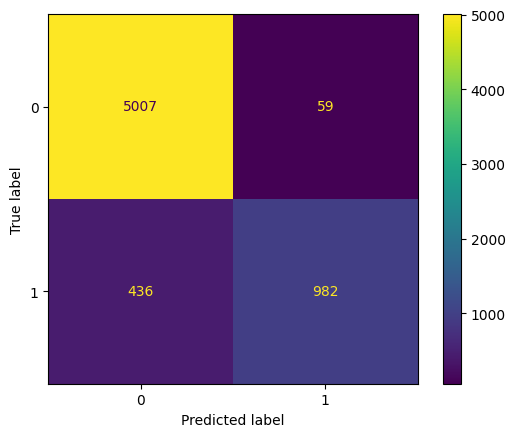

In [89]:
plot_confusion_matrix(best_estimator,x_test,y_test)

In [90]:
best_estimator.score(x_test,y_test)

0.9236582356570019

Precession Recall Curve

/Users/abhi/.local/share/virtualenvs/Credit_Risk-qmxO0yjC/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


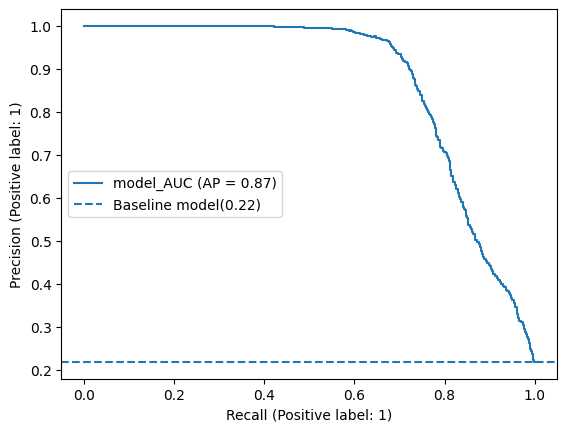

In [97]:
plot_precision_recall_curve(estimator=best_estimator,X=x_test,y=y_test,name='model_AUC')
baseline=y_test.sum()/len(y_test)
plt.axhline(baseline,ls='--',label=f'Baseline model({round(baseline,2)})')
plt.legend(loc='best')

In [100]:
a,b,c=learning_curve(best_estimator,x_train,y_train,n_jobs=-1,scoring='accuracy')

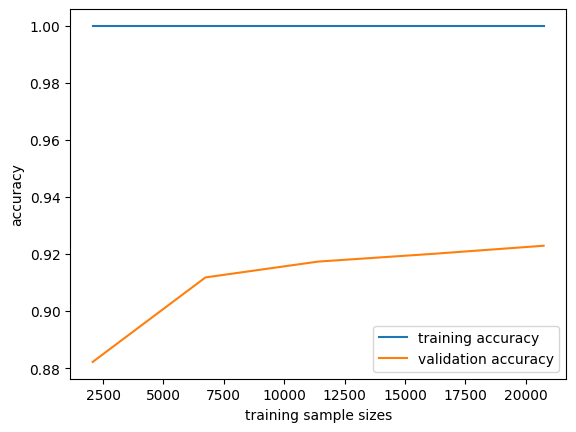

In [101]:
plt.plot(a,b.mean(axis=1),label='training accuracy')
plt.plot(a,c.mean(axis=1),label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

Overfitting identified

In [112]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
    'model__max_depth':[2,9,13],
    'model__min_samples_split':[4,6,8],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},

}

In [113]:
for clf ,param in grid.items():
    print(clf),
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'model__max_depth': [2, 9, 13], 'model__min_samples_split': [4, 6, 8], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [114]:
full_dataframe=pd.DataFrame()
best_algos={}

for clf,param in grid.items():
    pipe=Pipeline([
        ('coltf',column_transformer),
        ('model',clf)
    ])
    gs=RandomizedSearchCV(estimator=pipe,param_distributions=param,scoring='accuracy',n_jobs=-1,verbose=3,n_iter=4,random_state=0)

    gs.fit(x_train,y_train)
    all_res=pd.DataFrame(gs.cv_results_)

    temp=all_res.loc[:, ['params','mean_test_score']]
    algo_name=str(clf).split('(')[0]
    temp['algo']=algo_name

    full_df=pd.concat([full_dataframe,temp],ignore_index=True)
    best_algos[algo_name]=gs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END coltf__num_pipe__impute__estimator=LinearRegression(), model__max_depth=13, model__min_samples_split=6, model__n_estimators=400;, score=0.903 total time=   8.8s
[CV 3/5] END coltf__num_pipe__impute__estimator=LinearRegression(), model__max_depth=13, model__min_samples_split=6, model__n_estimators=400;, score=0.914 total time=   9.1s
[CV 2/5] END coltf__num_pipe__impute__estimator=LinearRegression(), model__max_depth=13, model__min_samples_split=6, model__n_estimators=400;, score=0.910 total time=   9.2s
[CV 5/5] END coltf__num_pipe__impute__estimator=LinearRegression(), model__max_depth=13, model__min_samples_split=6, model__n_estimators=400;, score=0.906 total time=   9.5s
[CV 4/5] END coltf__num_pipe__impute__estimator=LinearRegression(), model__max_depth=13, model__min_samples_split=6, model__n_estimators=400;, score=0.909 total time=   9.5s
[CV 1/5] END coltf__num_pipe__impute__estimator=KNeighborsRegressor(),

In [115]:
full_df.sort_values('mean_test_score',ascending=False)

,params,mean_test_score,algo
0,"{'model__n_estimators': 400, 'model__min_sampl...",0.908495,RandomForestClassifier
3,"{'model__n_estimators': 400, 'model__min_sampl...",0.863900,RandomForestClassifier
1,"{'model__n_estimators': 300, 'model__min_sampl...",0.782463,RandomForestClassifier
2,"{'model__n_estimators': 400, 'model__min_sampl...",0.782347,RandomForestClassifier


In [117]:
be=best_algos['RandomForestClassifier']
be

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=13,
                                        min_samples_split=6, n_estimators=400,
                                        n_jobs=-1, random_state=0))])

In [118]:
be.fit(x_train,y_train)

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=13,
                                        min_samples_split=6, n_estimators=400,
                                        n_jobs=-1, random_state=0))])

In [120]:
preds=be.predict(x_test)

In [122]:
confusion_matrix(y_test,preds)

array([[4841,  225],
       [ 362, 1056]])

In [123]:
print(classification_report(y_test,preds)) #precession and recall  both have now imoroved

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5066
           1       0.82      0.74      0.78      1418

    accuracy                           0.91      6484
   macro avg       0.88      0.85      0.86      6484
weighted avg       0.91      0.91      0.91      6484



/Users/abhi/.local/share/virtualenvs/Credit_Risk-qmxO0yjC/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


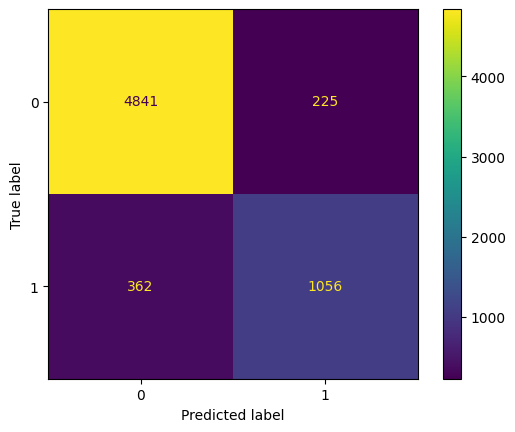

In [124]:
plot_confusion_matrix(be,x_test,y_test)


/Users/abhi/.local/share/virtualenvs/Credit_Risk-qmxO0yjC/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


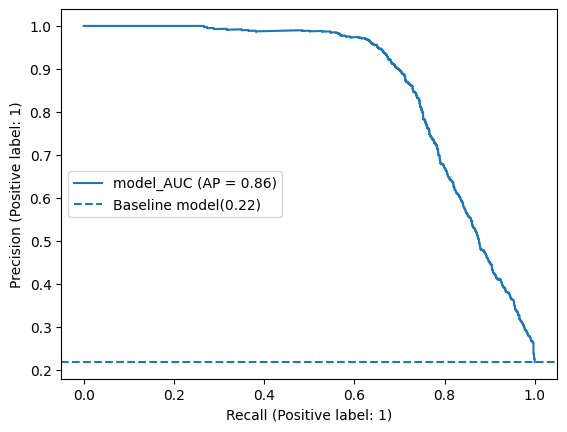

In [125]:
plot_precision_recall_curve(estimator=be,X=x_test,y=y_test,name='model_AUC')
baseline=y_test.sum()/len(y_test)
plt.axhline(baseline,ls='--',label=f'Baseline model({round(baseline,2)})')
plt.legend(loc='best')

In [126]:
a,b,c=learning_curve(be,x_train,y_train,n_jobs=-1,scoring='accuracy')

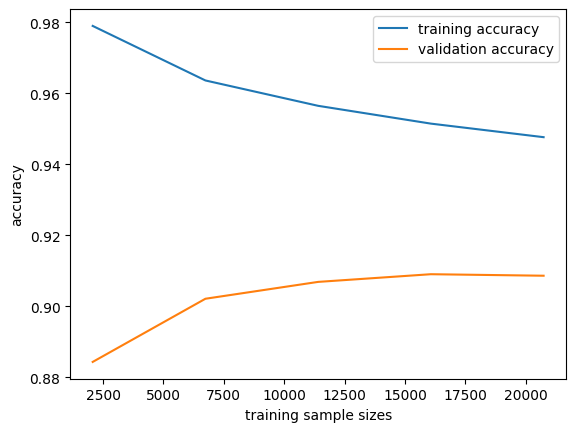

In [127]:
plt.plot(a,b.mean(axis=1),label='training accuracy')
plt.plot(a,c.mean(axis=1),label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
#model is doing much better now after pruning the tree and  the gap between test nd train has gone down now 